In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
price_details= pd.read_csv('/kaggle/input/housing-price-prediction-data/housing_price_dataset.csv')
price_details.head(10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
5,2095,2,3,Suburb,2020,198208.803907
6,2724,2,1,Suburb,1993,343429.319110
7,2044,4,3,Rural,1957,184992.321268
8,2638,4,3,Urban,1959,377998.588152
9,1121,5,2,Urban,2004,95961.926014


In [3]:
price_details.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [4]:
#price_details.duplicated() #This gives boolean value as True/False- depending upon duplicates present 
#price_details[price_details.duplicated()] #This gives duplicate values along with that retrives details of those rows
price_details[price_details.duplicated(keep= False)] #keep=False : will mark all occurrences of duplicates as True

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price


In [5]:
null_rows = price_details.isnull()
nan_rows= price_details[price_details.isnull().any(axis=1)] #any(axis=1) part checks if any NaN value is present in each row.
print(nan_rows)

Empty DataFrame
Columns: [SquareFeet, Bedrooms, Bathrooms, Neighborhood, YearBuilt, Price]
Index: []


In [6]:
#get negative numbers
negative_values = price_details[price_details['Price'] < 0]
negative_values

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
1266,1024,2,2,Urban,2006,-24715.242482
2310,1036,4,1,Suburb,1983,-7550.504574
3630,1235,3,2,Rural,2012,-19871.251146
4162,1352,5,2,Suburb,1977,-10608.359522
5118,1140,4,1,Urban,2020,-23911.003119
5951,1097,4,3,Rural,1981,-4537.418615
6355,1016,5,2,Rural,1997,-13803.684059
8720,1235,3,1,Urban,1952,-24183.000515
9611,1131,3,3,Urban,1959,-13692.026068
10597,1177,2,3,Urban,2010,-434.097124


In [7]:
#droppinf negative rows from dataset
price_details = price_details[price_details['Price'] >= 0]
price_details

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [8]:
#Group by neighbor to check price trend
price_trend=price_details.groupby('Neighborhood')['Price'].sum().reset_index()
price_trend

,Neighborhood,Price
0,Rural,3.737122e+09
1,Suburb,3.732732e+09
2,Urban,3.771781e+09


In [9]:
# Since price is exponential, convert it into integer
price_trend['Price'] = price_trend['Price'].astype(int)
# Display the resulting DataFrame
print(price_trend)

  Neighborhood       Price
0        Rural  3737121833
1       Suburb  3732732412
2        Urban  3771780654


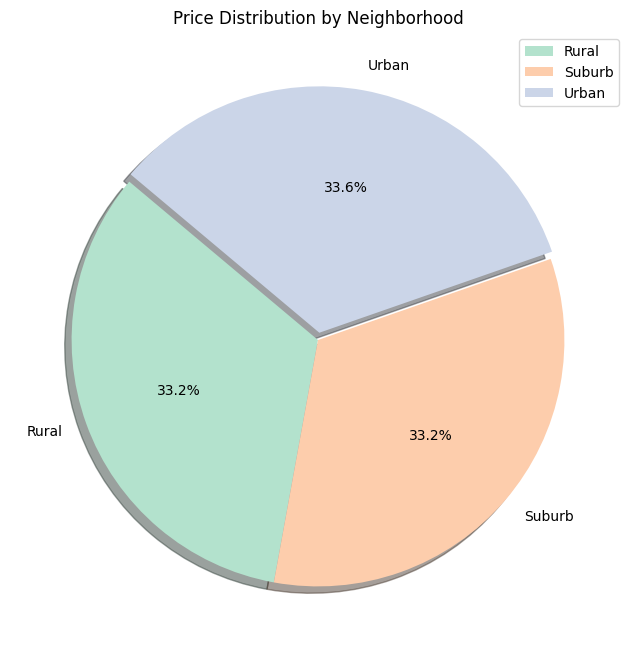

In [10]:
explode = (0, 0, 0.03)
colors = plt.cm.Pastel2(range(len(price_trend)))
# Create a pie chart with explode
plt.figure(figsize=(8, 8))
plt.pie(price_trend['Price'],colors=colors, labels=price_trend['Neighborhood'], autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.title('Price Distribution by Neighborhood')
plt.legend()
plt.show()